# Basics

## The Orfeo ToolBox Application mechanism

### Description

#### Summary

During this exercise, we will learn how to use the Orfeo Toolbox applications. Images including messages encoded by steganography are available. You must use the OTB applications to reveal this hidden message for each image.

All images used during this exercise are modified extracts from Pléiades images.


#### Prerequisites

* Software installed (Monteverdi and Orfeo TooLBox)
* Data downloaded: make sure to download once the required dataset by using the next block

In [226]:
!curl -o WorkshopData.zip https://www.orfeo-toolbox.org/packages/WorkshopData/WorkshopData.zip ; \
    rm -rf WorkshopData ; unzip WorkshopData.zip > log ; echo "Done"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1667M  100 1667M    0     0   109M      0  0:00:15  0:00:15 --:--:--  112M
Done



#### Objectives

* Know how to look for an application in the list of available applications
* Know how to set application parameters
* Know where the documentation of an application is
* Know how to use several classical applications.


### Steps

Data are located in the `Data/stegano` folder.

For each message, one will first look at the image to try to detect the message, then try to use suggested
applications to reveal the message.


#### Message 1 

In message1.tif image, a sentence has been encoded in a high signal area, using a pixel
value which is outside of possible range for Pléiades (reminder: Pléiades images are encoded with unsigned
12 bits integers).

Use the BandMath application to detect those out of range values and thus reveal the message.

#### Solution 1

To reveal the first message, one can observe that a Pléiades image is encoded using 12 bits, and that there
should not be any pixel value higher than: $$2^{12} −1 = 4095$$ We will therefore use the **BandMath** application
to threshold pixels higher than this value:

In [92]:
!otbcli_BandMath -il WorkshopData/stegano/image1.tif \
    -out decoded1.tif uint8 \
    -exp "im1b1>4095?255:0"

2022-06-29 12:47:30 (INFO): Loading kwl metadata from official product in file WorkshopData/stegano/image1.tif
2022-06-29 12:47:30 (INFO): Default RAM limit for OTB is 128 MB
2022-06-29 12:47:30 (INFO): GDAL maximum cache size is 1600 MB
2022-06-29 12:47:30 (INFO): OTB will use at most 8 threads
2022-06-29 12:47:30 (INFO): Image #1 has 1 components

2022-06-29 12:47:30 (INFO): Estimated memory for full processing: 53.3962MB (avail.: 128 MB), optimal image partitioning: 1 blocks
2022-06-29 12:47:30 (INFO): File decoded1.tif will be written in 1 blocks of 2000x2000 pixels
Writing decoded1.tif...: 100% [**************************************************]2022-06-29 12:47:30 (WARNING): Skipping GCPs saving to prevent GDAL from assigning a WGS84 projref to file (decoded1.tif)
 (0 seconds)


Then, display the resulting image.

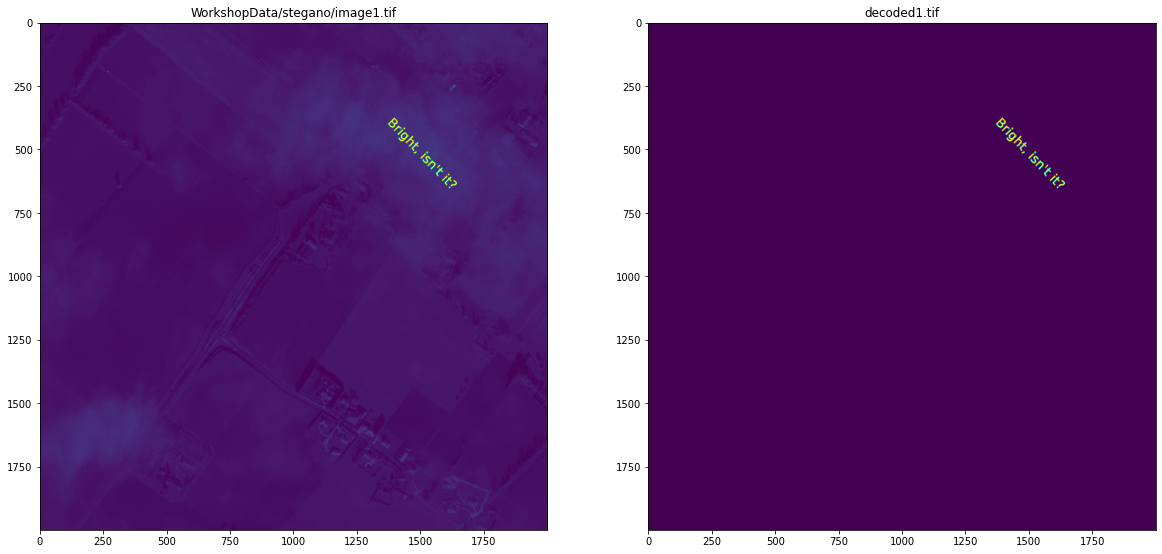

In [93]:
import matplotlib.pyplot as plt
import cv2

w = 10
h = 10
fig = plt.figure(figsize=(20, 10))
columns = 2
rows = 1
tiffs=["WorkshopData/stegano/image1.tif","decoded1.tif"]
for i in range(1, columns*rows +1):
    img = cv2.imread("./"+tiffs[i-1], cv2.IMREAD_UNCHANGED)
    subPlot=fig.add_subplot(rows, columns, i)
    subPlot.set_title(tiffs[i-1])
    plt.imshow(img)
plt.show()



#### Message 2 

In `image2.tif` image, a sentence has been encoded within a homogeneous, low signal
area. Modified pixels can not be seen with human eyes, but could be revealed by computing the image
gradient, or some edge detection.

Use the **EdgeExtraction** application to reveal the message.

#### Solution 2

To decode the second message we will compute the image gradient using the EdgeExtraction application:

In [229]:
!otbcli_EdgeExtraction -in WorkshopData/stegano/image2.tif \
    -filter gradient \
    -out decoded2.tif

2022-06-22 22:55:49 (INFO): Default RAM limit for OTB is 128 MB
2022-06-22 22:55:49 (INFO): GDAL maximum cache size is 1600 MB
2022-06-22 22:55:49 (INFO): OTB will use at most 8 threads
2022-06-22 22:55:49 (INFO): Loading kwl metadata from official product in file WorkshopData/stegano/image2.tif
2022-06-22 22:55:49 (INFO): Estimated memory for full processing: 77.4887MB (avail.: 128 MB), optimal image partitioning: 1 blocks
2022-06-22 22:55:49 (INFO): File decoded2.tif will be written in 1 blocks of 2000x2000 pixels
Writing decoded2.tif...: 100% [**************************************************]2022-06-22 22:55:49 (WARNING): Skipping GCPs saving to prevent GDAL from assigning a WGS84 projref to file (decoded2.tif)
 (0 seconds)


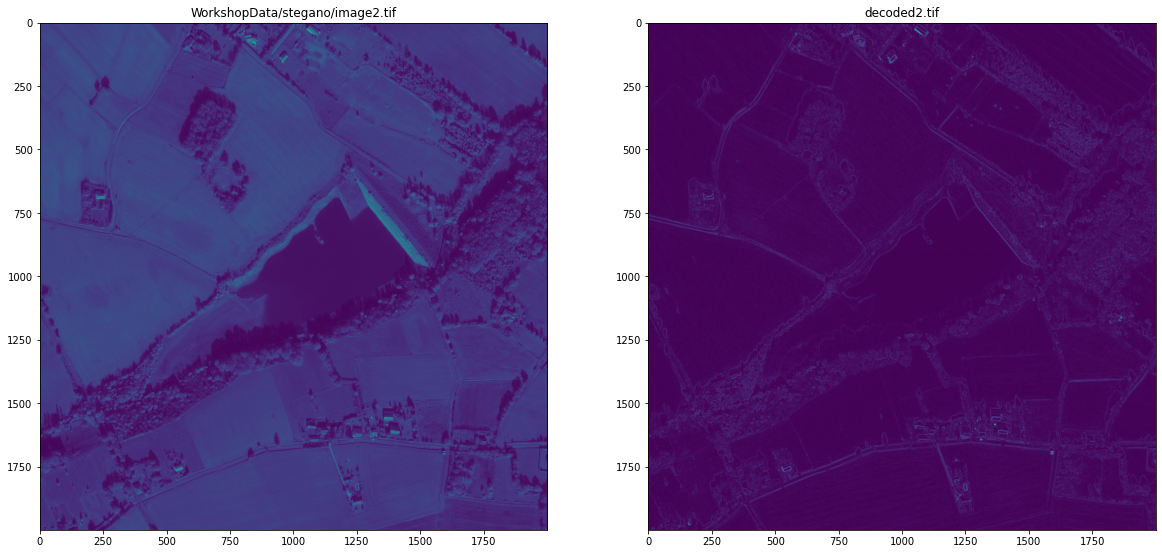

In [230]:
import matplotlib.pyplot as plt
import cv2

w = 10
h = 10
fig = plt.figure(figsize=(20, 10))
columns = 2
rows = 1
tiffs=["WorkshopData/stegano/image2.tif","decoded2.tif"]
for i in range(1, columns*rows +1):
    img = cv2.imread("./"+tiffs[i-1], cv2.IMREAD_UNCHANGED)
    subPlot=fig.add_subplot(rows, columns, i)
    subPlot.set_title(tiffs[i-1])
    plt.imshow(img)
plt.show()

#### Message 3 

In image3.tif image, a sentence has been encoded by slightly modifying the pixel values
in the red and near infra-red bands. This modification can not be seen with human eyes, but could be
revealed by computing an NDVI radiometric index.

Use the RadiometricIndices application to reveal the message.
You can also use the BandMath application to compute the NDVI index using the following formula:

$$
NDVI = { NIR−RED \over NIR+RED }
$$

Reminder: For Pléiades images the red band is the first one, and the NIR band is the last one.

#### Solution 3

To decode the third message, one can compute a vegetation index such as the NDVI using the RadiometricIndices application:

In [231]:
!otbcli_RadiometricIndices -in WorkshopData/stegano/image3.tif \
    -channels.red 1 \
    -channels.nir 4 \
    -list Vegetation:NDVI \
    -out decoded3.tif

2022-06-22 22:57:33 (INFO): Default RAM limit for OTB is 128 MB
2022-06-22 22:57:33 (INFO): GDAL maximum cache size is 1600 MB
2022-06-22 22:57:33 (INFO): OTB will use at most 8 threads
2022-06-22 22:57:33 (INFO): Loading kwl metadata from official product in file WorkshopData/stegano/image3.tif
2022-06-22 22:57:33 (INFO): Vegetation:NDVI added.
2022-06-22 22:57:33 (INFO): Estimated memory for full processing: 122.032MB (avail.: 128 MB), optimal image partitioning: 1 blocks
2022-06-22 22:57:33 (INFO): File decoded3.tif will be written in 1 blocks of 2000x2000 pixels
Writing decoded3.tif...: 100% [**************************************************]2022-06-22 22:57:33 (WARNING): Skipping GCPs saving to prevent GDAL from assigning a WGS84 projref to file (decoded3.tif)
 (0 seconds)


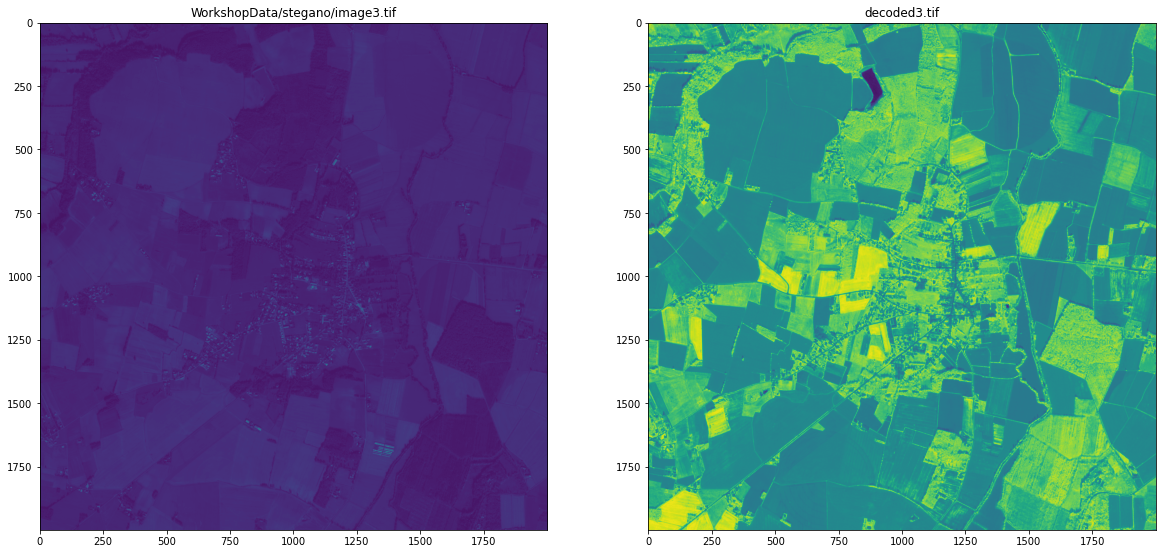

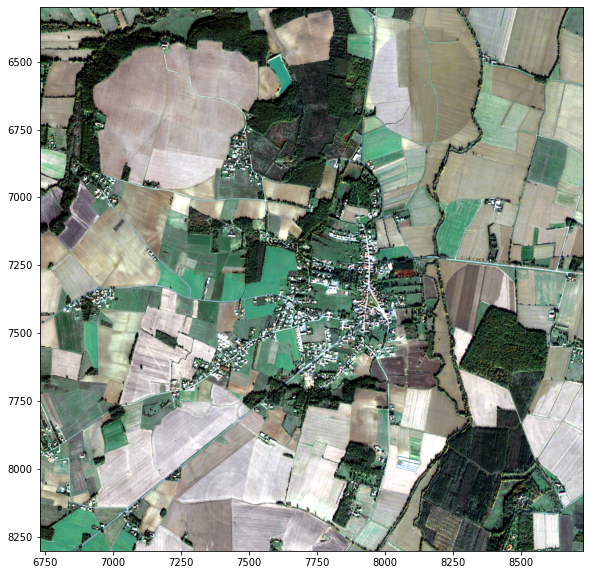

In [91]:
import matplotlib.pyplot as plt
import cv2

w = 10
h = 10
fig = plt.figure(figsize=(20, 10))
columns = 2
rows = 1
tiffs=["WorkshopData/stegano/image3.tif","decoded3.tif"]
for i in range(1, columns*rows +1):
    img = cv2.imread("./"+tiffs[i-1], cv2.IMREAD_UNCHANGED)
    subPlot=fig.add_subplot(rows, columns, i)
    subPlot.set_title(tiffs[i-1])
    plt.imshow(img)
plt.show()

import rasterio as rio
import numpy as np

def pct_clip(array,pct=[2,98]):
    array_min, array_max = np.nanpercentile(array,pct[0]), np.nanpercentile(array,pct[1])
    clip = (array - array_min) / (array_max - array_min)
    clip[clip>1]=1
    clip[clip<0]=0
    return clip

with rio.open("WorkshopData/stegano/image3.tif") as src:
    with rio.open(
            'RGB_Temp.tif', 'w+',
            driver='GTiff',
            dtype= rio.float32,
            count=3,
            crs = src.crs,
            width=src.width,
            height=src.height,
            transform=src.transform,
        ) as dst:
        V = pct_clip(src.read(1))
        dst.write(V,1)
        V = pct_clip(src.read(2))
        dst.write(V,2)
        V = pct_clip(src.read(3))
        dst.write(V,3)
    
fig,ax=plt.subplots(figsize=(20, 10))
with rio.open("RGB_Temp.tif") as src2:
    show(src2.read(),transform=src2.transform,ax=ax)


In [88]:
!otbcli_BandMath -il WorkshopData/stegano/image3.tif \
    -out decoded31.tif \
    -exp "((im1b4-im1b1)/(im1b4+im1b1))"

2022-06-24 12:58:45 (INFO): Loading kwl metadata from official product in file WorkshopData/stegano/image3.tif
2022-06-24 12:58:45 (INFO): Default RAM limit for OTB is 128 MB
2022-06-24 12:58:45 (INFO): GDAL maximum cache size is 1600 MB
2022-06-24 12:58:45 (INFO): OTB will use at most 8 threads
2022-06-24 12:58:45 (INFO): Image #1 has 4 components

2022-06-24 12:58:45 (INFO): Estimated memory for full processing: 167.809MB (avail.: 128 MB), optimal image partitioning: 2 blocks
2022-06-24 12:58:45 (INFO): File decoded31.tif will be written in 3 blocks of 2000x667 pixels
Writing decoded31.tif...: 32% [****************                                  ]2022-06-24 12:58:45 (WARNING): Skipping GCPs saving to prevent GDAL from assigning a WGS84 projref to file (decoded31.tif)
Writing decoded31.tif...: 100% [**************************************************] (0 seconds)


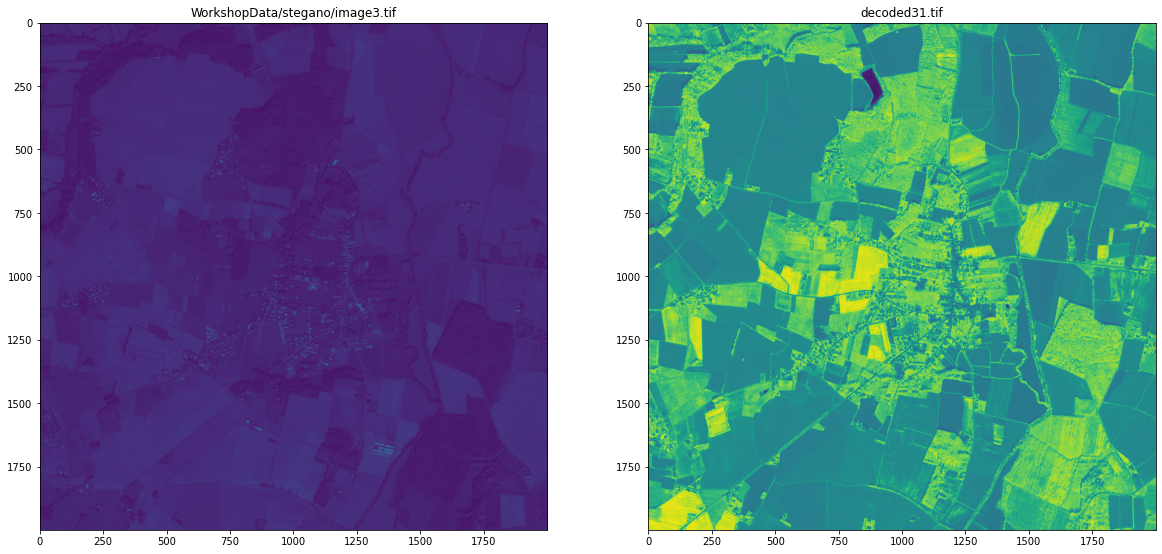

In [89]:
import matplotlib.pyplot as plt
import cv2

w = 10
h = 10
fig = plt.figure(figsize=(20, 10))
columns = 2
rows = 1
tiffs=["WorkshopData/stegano/image3.tif","decoded31.tif"]
for i in range(1, columns*rows +1):
    img = cv2.imread("./"+tiffs[i-1], cv2.IMREAD_UNCHANGED)
    subPlot=fig.add_subplot(rows, columns, i)
    subPlot.set_title(tiffs[i-1])
    plt.imshow(img)
plt.show()

#### Message 4

In image4.tif, a message has been hidden in the 2 least significant bits of the image. This
modification can not be detected by human eyes, but could be revealed by isolating the values of those 2
bits.
Use the BandMath application to isolate the 2 least significant bits in the image (encoded on 12 bits),
to reveal the message.
Note: The rint() function allows to round a floating point value to nearest integer in BandMath application

#### Solution 4

To reveal the 4th message, we are going to isolate the 2 least significant bits using the BandMath application:

In [237]:
!otbcli_BandMath -il ./WorkshopData/stegano/image4.tif \
    -out decoded4.tif \
    -exp "im1b1-4*rint(im1b1/4)"

2022-06-22 22:58:39 (INFO): Loading kwl metadata from official product in file ./WorkshopData/stegano/image4.tif
2022-06-22 22:58:39 (INFO): Default RAM limit for OTB is 128 MB
2022-06-22 22:58:39 (INFO): GDAL maximum cache size is 1600 MB
2022-06-22 22:58:39 (INFO): OTB will use at most 8 threads
2022-06-22 22:58:39 (INFO): Image #1 has 1 components

2022-06-22 22:58:39 (INFO): Estimated memory for full processing: 76.2558MB (avail.: 128 MB), optimal image partitioning: 1 blocks
2022-06-22 22:58:39 (INFO): File decoded4.tif will be written in 1 blocks of 2000x2000 pixels
Writing decoded4.tif...: 100% [**************************************************]2022-06-22 22:58:40 (WARNING): Skipping GCPs saving to prevent GDAL from assigning a WGS84 projref to file (decoded4.tif)
 (0 seconds)


In [246]:
!otbcli_BandMath -il ./WorkshopData/stegano/image4.tif \
    -out decoded41.tif \
    -exp "4*rint(im1b1/4)"

2022-06-22 23:00:56 (INFO): Loading kwl metadata from official product in file ./WorkshopData/stegano/image4.tif
2022-06-22 23:00:56 (INFO): Default RAM limit for OTB is 128 MB
2022-06-22 23:00:56 (INFO): GDAL maximum cache size is 1600 MB
2022-06-22 23:00:56 (INFO): OTB will use at most 8 threads
2022-06-22 23:00:56 (INFO): Image #1 has 1 components

2022-06-22 23:00:56 (INFO): Estimated memory for full processing: 76.2558MB (avail.: 128 MB), optimal image partitioning: 1 blocks
2022-06-22 23:00:56 (INFO): File decoded41.tif will be written in 1 blocks of 2000x2000 pixels
Writing decoded41.tif...: 100% [**************************************************]2022-06-22 23:00:56 (WARNING): Skipping GCPs saving to prevent GDAL from assigning a WGS84 projref to file (decoded41.tif)
 (0 seconds)


The following expression does not contain the 2 least significant bits, and the difference with original image thus reveals the message.

$$4 * rint({im1b1 \over 4})$$ 

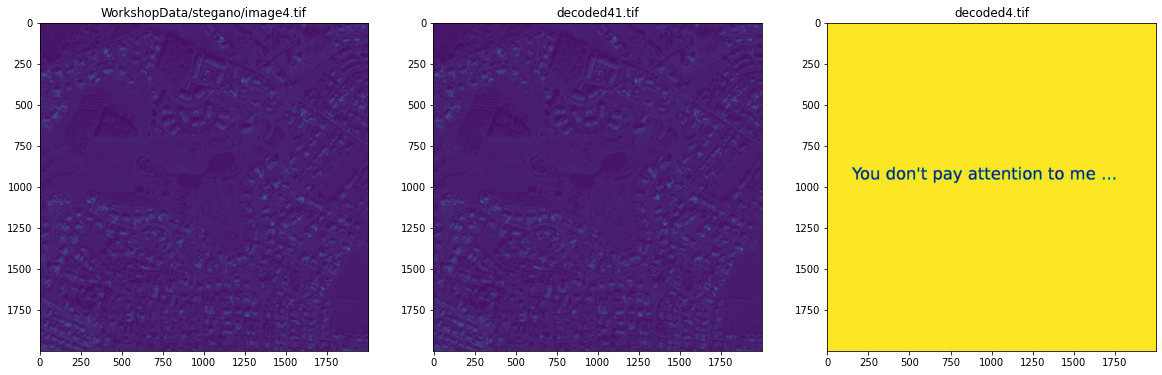

In [68]:
import matplotlib.pyplot as plt
import cv2

w = 10
h = 10
fig = plt.figure(figsize=(20, 10))
columns = 3
rows = 1
tiffs=["WorkshopData/stegano/image4.tif","decoded41.tif","decoded4.tif"]
for i in range(1, columns*rows +1):
    img = cv2.imread("./"+tiffs[i-1], cv2.IMREAD_UNCHANGED)
    subPlot=fig.add_subplot(rows, columns, i)
    subPlot.set_title(tiffs[i-1])
    plt.imshow(img) 
plt.show()

#### Message 5 

In image `image5.tif`, a message has been dissimulated by locally slightly modifying the
image noise. It could be revealed by a transform that isolates noise.
Use the **DimensionalityReduction** application to isolate the image noise and reveal the message.
You can also try to figure out other techniques using the applications to highlight this local modification
of the image noise.

In [ ]:
import matplotlib.pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(20, 10))
columns = 3
rows = 1
tiffs=["WorkshopData/stegano/image5.tif"]
for i in range(1, columns*rows +1):
    img = cv2.imread("./"+tiffs[i-1], cv2.IMREAD_UNCHANGED)
    subPlot=fig.add_subplot(rows, columns, i)
    subPlot.set_title(tiffs[i-1])
    plt.imshow(img)
plt.show()


To reveal this 5th message, we are going to do a principal component analysis using the DimensionalityReduction application, and extract the last band, where the image noise is condensed, using the ExtractROI application.

In [1]:
!otbcli_DimensionalityReduction -in ./WorkshopData/stegano/image5.tif \
    -out pca6.tif \
    -method pca ; \
 \
 otbcli_ExtractROI -in pca6.tif \
    -out decoded6.tif \
    -cl Channel4

/usr/bin/otbApplicationLauncherCommandLine: symbol lookup error: /usr/lib/x86_64-linux-gnu/libotbossimplugins-6.4.so.1: undefined symbol: _ZN16ossimSensorModel12getObsCovMatERK8ossimDptRN6NEWMAT15SymmetricMatrixEd
2022-06-23 12:34:25 (FATAL): Cannot open image pca6.tif. The file does not exist.


Image data of dtype object cannot be converted to float


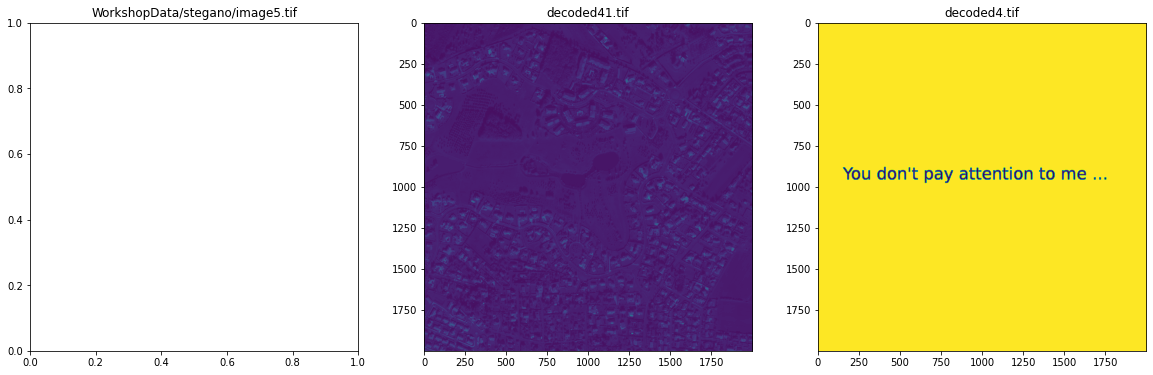

In [259]:
import matplotlib.pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(20, 10))
columns = 3
rows = 1
tiffs=["WorkshopData/stegano/image5.tif","pca6.tif","decoded4.tif"]
for i in range(1, columns*rows +1):
    try:
        img = cv2.imread("./"+tiffs[i-1], cv2.IMREAD_UNCHANGED)
        subPlot=fig.add_subplot(rows, columns, i)
        subPlot.set_title(tiffs[i-1])
        plt.imshow(img)
    except Exception as e:
        print(e)
        
plt.show()

IndexError: band index 2 out of range (not in (1,))

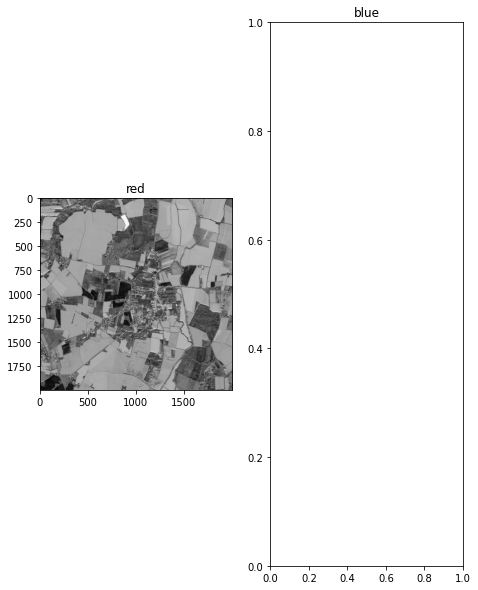

In [84]:
import rasterio
from matplotlib import pyplot
#src = rasterio.open("WorkshopData/stegano/image3.tif")
src = rasterio.open("decoded31.tif")

import matplotlib.pyplot as plt

w = 10
h = 10

fig = plt.figure(figsize=(20, 10))

columns = 5
rows = 1

subPlot=fig.add_subplot(rows, columns, 1)
subPlot.set_title("red")
pyplot.imshow(src.read(1), cmap='Greys')

subPlot=fig.add_subplot(rows, columns, 2)
subPlot.set_title("blue")
pyplot.imshow(src.read(2), cmap='Blues')
subPlot=fig.add_subplot(rows, columns, 3)
subPlot.set_title("green")
pyplot.imshow(src.read(3), cmap='Greens')
subPlot=fig.add_subplot(rows, columns, 4)
subPlot.set_title("grey")
pyplot.imshow(src.read(4), cmap='Greys')
#subPlot=fig.add_subplot(rows, columns, 5)
#subPlot.set_title("green")
#pyplot.imshow(src.read(4), cmap='RGBA')

pyplot.show()

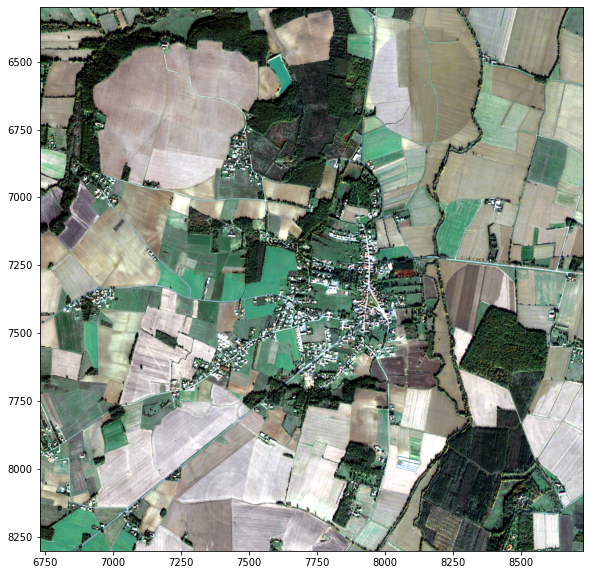

In [81]:
import rasterio as rio

def pct_clip(array,pct=[2,98]):
    array_min, array_max = np.nanpercentile(array,pct[0]), np.nanpercentile(array,pct[1])
    clip = (array - array_min) / (array_max - array_min)
    clip[clip>1]=1
    clip[clip<0]=0
    return clip

with rio.open("WorkshopData/stegano/image3.tif") as src:
    with rio.open(
            'RGB_Temp1.tif', 'w+',
            driver='GTiff',
            dtype= rio.float32,
            count=3,
            crs = src.crs,
            width=src.width,
            height=src.height,
            transform=src.transform,
        ) as dst:
        V = pct_clip(src.read(1))
        dst.write(V,1)
        V = pct_clip(src.read(2))
        dst.write(V,2)
        V = pct_clip(src.read(3))
        dst.write(V,3)
    
fig,ax=plt.subplots(figsize=(20, 10))
with rio.open("RGB_Temp1.tif") as src2:
    show(src2.read(),transform=src2.transform,ax=ax)

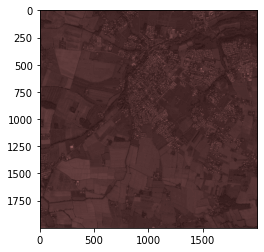

In [79]:
import rasterio
from matplotlib import pyplot
src = rasterio.open("WorkshopData/stegano/image5.tif")
pyplot.imshow(src.read(1), cmap='pink')

pyplot.show()


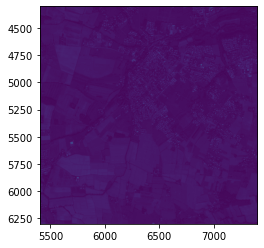

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


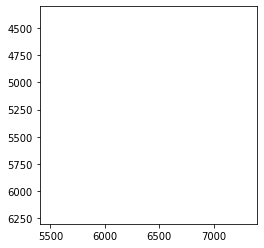

<AxesSubplot:>

In [80]:
from rasterio.plot import show
show(src)
show(src.read(), transform=src.transform)

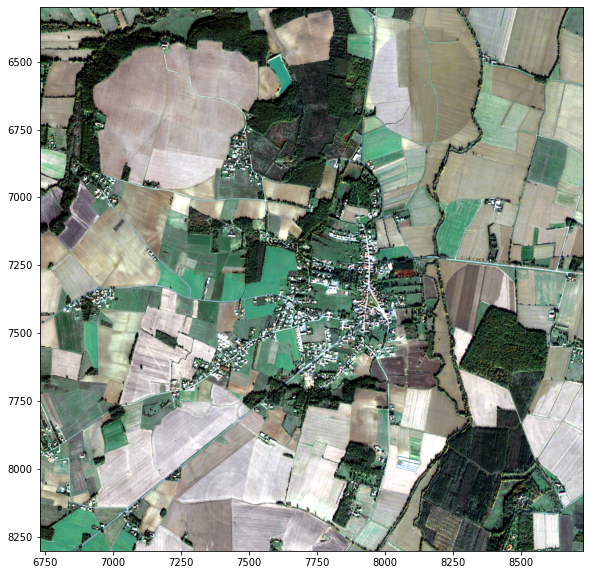

In [70]:
import rasterio as rio
import numpy as np
from rasterio.plot import show

def pct_clip(array,pct=[2,98]):
    array_min, array_max = np.nanpercentile(array,pct[0]), np.nanpercentile(array,pct[1])
    clip = (array - array_min) / (array_max - array_min)
    clip[clip>1]=1
    clip[clip<0]=0
    return clip

with rio.open("WorkshopData/stegano/image3.tif") as src:
    with rio.open(
            'RGB_Temp.tif', 'w+',
            driver='GTiff',
            dtype= rio.float32,
            count=3,
            crs = src.crs,
            width=src.width,
            height=src.height,
            transform=src.transform,
        ) as dst:
        V = pct_clip(src.read(1))
        dst.write(V,1)
        V = pct_clip(src.read(2))
        dst.write(V,2)
        V = pct_clip(src.read(3))
        dst.write(V,3)
    
fig,ax=plt.subplots(figsize=(20, 10))
with rio.open("RGB_Temp.tif") as src2:
    show(src2.read(),transform=src2.transform,ax=ax)

#### Message 6 

In `image6.tif` image, a message has been hidden by locally using a gray-level morphological operation (opening with radius=1). It could be revealed by using the idempotent property of this
transform. A function f is said idempotent if:
$$ f(f(x)) = f(x)$$
Use the **GrayscaleMorphologicalOperation** and **BandMath** applications to reveal the message by
using this idempotent property

#### Solution 6

To reveal the 6th message, we are going to use the idempotent property. If the message has been encoded
using an idempotent transform, then f(message) = message, and therefore f(message) − message = 0,
while outside of the image we will see f(image).

In [260]:
! otbcli_GrayScaleMorphologicalOperation -in WorkshopData/stegano/image6.tif \
    -out ouverture6.tif \
    -structype.ball.xradius 1 \
    -structype.ball.yradius 1 \
    -filter opening ; \
    \
    otbcli_BandMath -il WorkshopData/stegano/image6.tif ouverture6.tif \
        -out decoded6.tif \
        -exp "(im2b1-im1b1)"

2022-06-22 23:20:04 (INFO): Default RAM limit for OTB is 128 MB
2022-06-22 23:20:04 (INFO): GDAL maximum cache size is 1600 MB
2022-06-22 23:20:04 (INFO): OTB will use at most 8 threads
2022-06-22 23:20:04 (INFO): Loading kwl metadata from official product in file WorkshopData/stegano/image6.tif
2022-06-22 23:20:04 (INFO): Estimated memory for full processing: 77.4887MB (avail.: 128 MB), optimal image partitioning: 1 blocks
2022-06-22 23:20:04 (INFO): File ouverture6.tif will be written in 1 blocks of 2000x2000 pixels
Writing ouverture6.tif...: 100% [**************************************************]2022-06-22 23:20:04 (WARNING): Skipping GCPs saving to prevent GDAL from assigning a WGS84 projref to file (ouverture6.tif)
 (0 seconds)
2022-06-22 23:20:04 (INFO): Loading kwl metadata from official product in file WorkshopData/stegano/image6.tif
2022-06-22 23:20:04 (INFO): Loading kwl metadata from attached geom file ouverture6.geom
2022-06-22 23:20:04 (INFO): Default RAM limit for OTB i

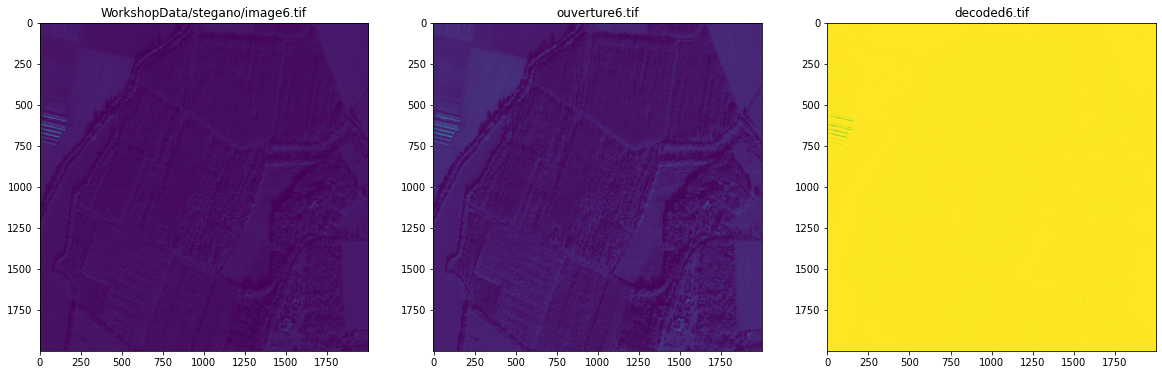

In [261]:
import matplotlib.pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(20, 10))
columns = 3
rows = 1
tiffs=["WorkshopData/stegano/image6.tif","ouverture6.tif","decoded6.tif"]
for i in range(1, columns*rows +1):
    img = cv2.imread("./"+tiffs[i-1], cv2.IMREAD_UNCHANGED)
    subPlot=fig.add_subplot(rows, columns, i)
    subPlot.set_title(tiffs[i-1])
    plt.imshow(img)
plt.show()

### Going further

What messages were you able to detect by analyzing the image with Monteverdi?
What messages were impossible to detect?

Can you imagine another process to encode hidden messages in images?
An image (image.tif) and a message (message.tif) are provided in the Data/stegano/diy folder for you to try.

[Internals.ipynb](./Internals.ipynb)


